In [172]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt      # Data Visualisation
import torch

In [173]:
#Temperature prediction example data
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

In [174]:
#Defining the linear model
def model_linear(t_u, w, b):
    return w * t_u + b

In [175]:
#Defining the non-linear model
def model_non_linear(t_u, w1, w2, b):
    return w2*t_u**2 + w1*t_u + b

In [176]:
#Mean Squared Error (MSE) calculation
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [177]:
#80% (training) and 20% (validation) split
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

In [178]:
#For efficient training shuffling the indices of the original dataset
shuffled_indices = torch.randperm(n_samples)

In [179]:
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
print(train_indices, val_indices)

tensor([2, 7, 4, 1, 3, 5, 6, 0, 8]) tensor([ 9, 10])


In [180]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

In [181]:
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

In [182]:
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [183]:
train_loss_list = []
val_loss_list = []
epoch_list = []

In [184]:
#Definition of the training loop for linear model
def training_loop_linear(n_epochs, optimizer, params_linear, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_linear(train_t_u, *params_linear) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
                             
        val_t_p = model_linear(val_t_u, *params_linear) # <1>
        val_loss = loss_fn(val_t_p, val_t_c)
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params_linear

In [185]:
#Definition of the training loop for non-linear model
def training_loop_non_lin(n_epochs, optimizer, params, train_t_u, train_t_c, val_t_u, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model_non_linear(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        val_t_p = model_non_linear(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        #val_loss_list.append(val_loss.item())
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        #train_loss_list.append(train_loss.item())
        
        if epoch <= 1 or epoch % 500 ==0:
            #epoch_list.append(epoch)
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}, "f"Validation loss {val_loss.item():.4f}")
    
    return params

In [186]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [187]:
t_un = 0.1 * t_u

In [188]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params_linear = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params_linear], lr=learning_rate)   #Using the Adam optimizer

#train the linear model for 5000 epoics
training_loop_linear(
    n_epochs = 5000, 
    optimizer = optimizer,
    params_linear = params_linear,
    train_t_u = train_t_un, 
    val_t_u = val_t_un, 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 70.5623, Validation loss 124.4736
Epoch 500, Training loss 2.8019, Validation loss 3.6016
Epoch 1000, Training loss 2.7944, Validation loss 3.5525
Epoch 1500, Training loss 2.7944, Validation loss 3.5525
Epoch 2000, Training loss 2.7944, Validation loss 3.5525
Epoch 2500, Training loss 2.7944, Validation loss 3.5525
Epoch 3000, Training loss 2.7944, Validation loss 3.5525
Epoch 3500, Training loss 2.7944, Validation loss 3.5525
Epoch 4000, Training loss 2.7944, Validation loss 3.5525
Epoch 4500, Training loss 2.7944, Validation loss 3.5525
Epoch 5000, Training loss 2.7944, Validation loss 3.5525


tensor([  5.3399, -17.1100], requires_grad=True)

In [189]:
#Initializing the parameters (weights and the biases) as ones and zeros respectively 
params = torch.tensor([1.0,1.0,0.0], requires_grad=True)
learning_rate = 0.1
optimizer = optim.Adam([params], lr = learning_rate)  #Using the Adam optimizer

#train the linear non-linear model for 5000 epoics
training_loop_non_lin(
    n_epochs=5000,
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un,
    train_t_c = train_t_c,
    val_t_u = val_t_un,
    val_t_c = val_t_c)

Epoch 1, Training loss 610.8647, Validation loss 967.9776
Epoch 500, Training loss 2.8865, Validation loss 2.1024
Epoch 1000, Training loss 2.4358, Validation loss 2.1949
Epoch 1500, Training loss 2.1512, Validation loss 2.3214
Epoch 2000, Training loss 2.0364, Validation loss 2.4386
Epoch 2500, Training loss 2.0074, Validation loss 2.5148
Epoch 3000, Training loss 2.0031, Validation loss 2.5494
Epoch 3500, Training loss 2.0028, Validation loss 2.5600
Epoch 4000, Training loss 2.0028, Validation loss 2.5621
Epoch 4500, Training loss 2.0028, Validation loss 2.5623
Epoch 5000, Training loss 2.0028, Validation loss 2.5624


tensor([  2.7463,   0.2527, -11.1461], requires_grad=True)

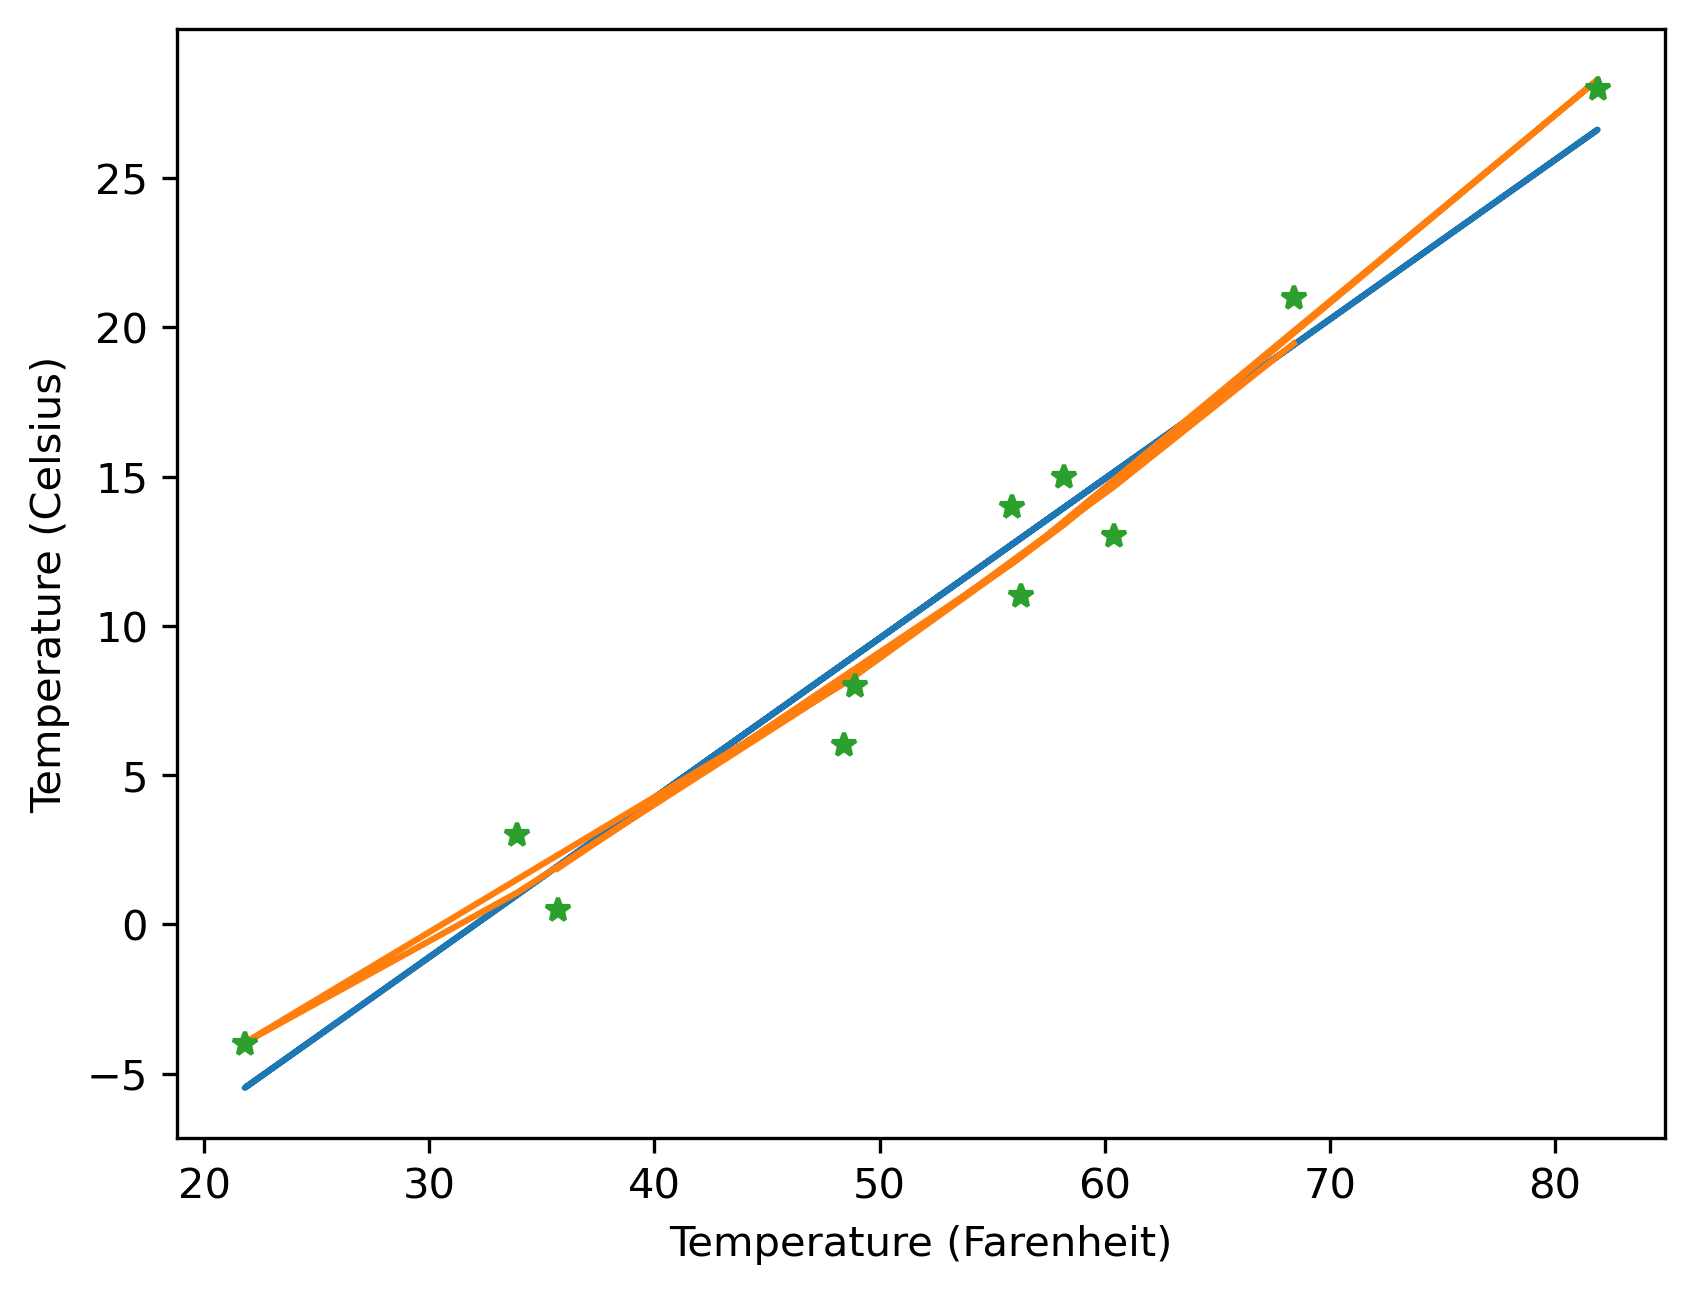

In [190]:
from matplotlib import pyplot as plt
#t_un = 0.1 * t_u
#t_p = model(t_un, *params)
t_p_linear = model_linear(t_un, *params_linear)
t_p_non_linear = model_non_linear(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Temperature (Celsius)')
plt.plot(t_u.numpy(), t_p_linear.detach().numpy())
plt.plot(t_u.numpy(), t_p_non_linear.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), '*')